# Carries/Take-ons Feature Exploration

In [2]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt

## General Plotting Functions

In [41]:
def scatter_plot(df, feature1, feature2):
    correlation = df[feature1].corr(df[feature2])
    
    plt.figure()
    plt.scatter(df[feature1], df[feature2], alpha = 0.1)
    plt.title(f'Scatter Plot of {feature1} vs {feature2}')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    
    plt.text(0.1, 0.9, f'Correlation: {correlation:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

    plt.show()

In [43]:
def grouped_boxplot (df, feature, group_feature):
    plt.figure()
    df.boxplot(column = feature, by = group_feature, grid = False, showmeans = True)
    plt.title(f'Box Plot of {feature} vs {group_feature}')
    plt.suptitle('')
    plt.xlabel(group_feature)
    plt.ylabel(feature)
    plt.show()

In [47]:
def category_boxplot (df, feature, group_feature, text_diff = 2):
    #create figure
    plt.figure()
    
    #prep data by grouping into two categories
    data = [df[df[group_feature] == 0][feature],   # Goals == 0
        df[df[group_feature] != 0][feature]]   # Goals != 0
    
    #create boxplot
    plt.boxplot(data, labels = [f'0 {group_feature}', f'Non-zero {group_feature}'], showmeans = True)
    plt.title(f'Box Plot of {feature} vs {group_feature} Category')
    plt.xlabel(f'{group_feature} Category')
    plt.ylabel(feature)
    
    #print mean/median 
    for i in range(len(data)):
        # Median (the horizontal line in the box)
        median = np.median(data[i])
        plt.text(i + 1.2, median, f'Median: {median:.2f}', ha='left', va='bottom', color='blue')

        # Mean (the green triangle in the boxplot)
        mean = np.mean(data[i])
        plt.text(i + 1.2, mean + text_diff, f'Mean: {mean:.2f}', ha='left', va='top', color='green')

    plt.show()

Exploratory Data Analysis of features related to carries and take-ons.

In [3]:
#load the att_explore dataframe in 
att_explore = pd.read_csv('att_explore.csv')
att_explore.head()

,Unnamed: 0,Player ID,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,...,RW,WB,Defenders,Midfielders,Wide Midfielders,Wingers,Penalty Success Rate,SOT Percentage,Team Goals,Pass Completion Percentage
0,10000,140,Sun,32,Away,L 1–2,Crystal Palace,Leicester City,Y,DM,...,0,0,0,1,0,0,NaN,0.0,1,83.783784
1,24977,340,Sat,29,Away,L 1–2,Bournemouth,Liverpool,N,LW,...,0,0,0,0,0,1,NaN,NaN,1,71.428571
2,37756,498,Sun,37,Away,D 0–0,Huddersfield,Manchester City,Y,CM,...,0,0,0,1,0,0,NaN,NaN,0,58.823529
3,18759,262,Sun,34,Away,D 2–2,Southampton,Brighton,N,LM,...,0,0,0,0,1,0,NaN,0.0,2,81.818182
4,168,3,Sun,38,Home,W 5–0,Manchester City,Norwich City,Y*,LM,...,0,0,0,0,1,0,NaN,0.2,5,87.500000


A 'Carry' is recorded when a player controls the ball with their feet. This is recorded as a 'Progressive Carry' if the carry moves the player towards the opponent's goal at least 10 yards. A 'Take-on' is the same as a dribble. So a 'Take-on' attempt is the number of times a player attempted to dribble past an opposing player. 

### Relationship between Carries and Progressive Carries

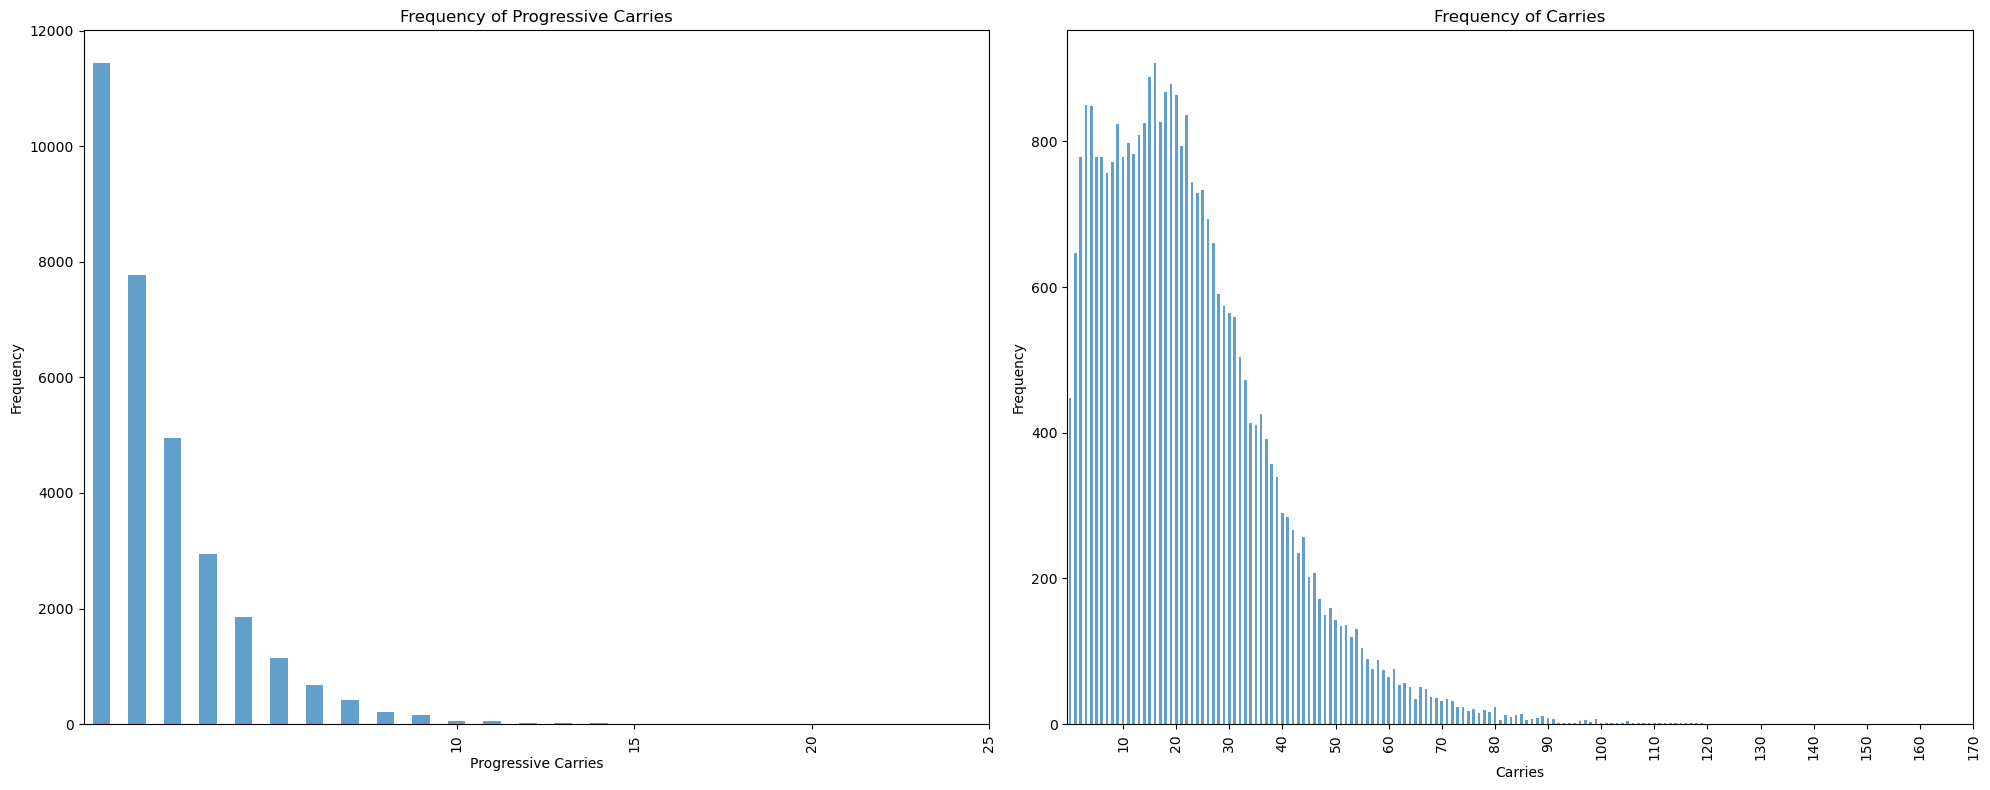

In [4]:
carries_count = att_explore['Carries'].value_counts().sort_index()
progcarries_count = att_explore['Progressive Carries'].value_counts().sort_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))

progcarries_count.plot(kind = 'bar', alpha = 0.7, ax = ax1)
ax1.set_xlabel('Progressive Carries')
ax1.set_ylabel('Frequency')
ax1.set_title('Frequency of Progressive Carries')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax1.set_xticks(range(10, 30, 5))
ax1.set_xticklabels(range(10, 30, 5))


carries_count.plot(kind = 'bar', alpha = 0.7, ax = ax2)
ax2.set_xlabel('Carries')
ax2.set_ylabel('Frequency')
ax2.set_title('Frequency of Carries')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax2.set_xticks(range(10, 180, 10))
ax2.set_xticklabels(range(10, 180, 10))

# plt.xticks(rotation = 0, fontsize = 7)
plt.tight_layout()
plt.show()

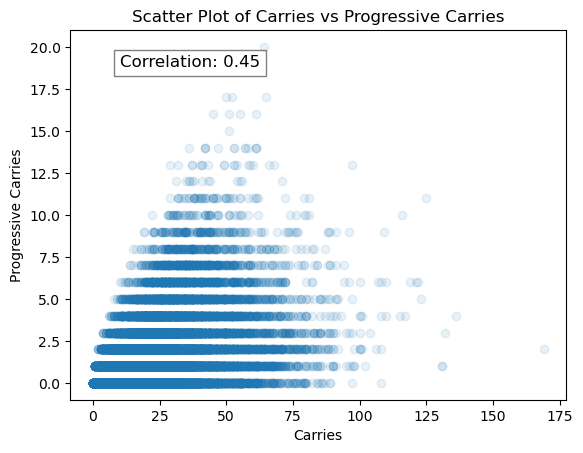

In [45]:
scatter_plot(att_explore, 'Carries', 'Progressive Carries')

The frequency plot show us that the both carries and progressive carries exhibit left-skewed behaviour. We can also see that carries are generally much more common, with the maximum value for carries just under 180, whilst the maximum value for progressive carries is only just under 25. The scatter plot of carries against progressive carries also shows that the relatioship between these two features is not particularly strong. A correlation of 0.45 indicates there is some relationship, but it is not strong enough to consider removing one of these features on the basis of them being too correlated with each other. In general, the more carries recorded is associated with a higher number of progressive carries. However, there are certain observations that deviate from this (e.g. the observation with 175 carries only recording approx 3 progressive carries, whilst multiple observations recording more than 15 progressive carries only having approx 50 to 75 carries). 

A potential explanation for this is the tendancy to accumulate carries/progressive carries when playing in different positions. Since a carry is recorded when a player controls the ball with their feet, it is perhaps more likely for midfielders to accumulate a high number of carries. However, they will also at the same time be less likely to record any progressive carries, since their role isn't to progress the ball forward through dribbling towards the goal. We can investigate this by comparing scatter plots of carries vs progressive carries for midfielders compared to wingers (who we expect are most likely to accumulate high numbers for progressive carries). 

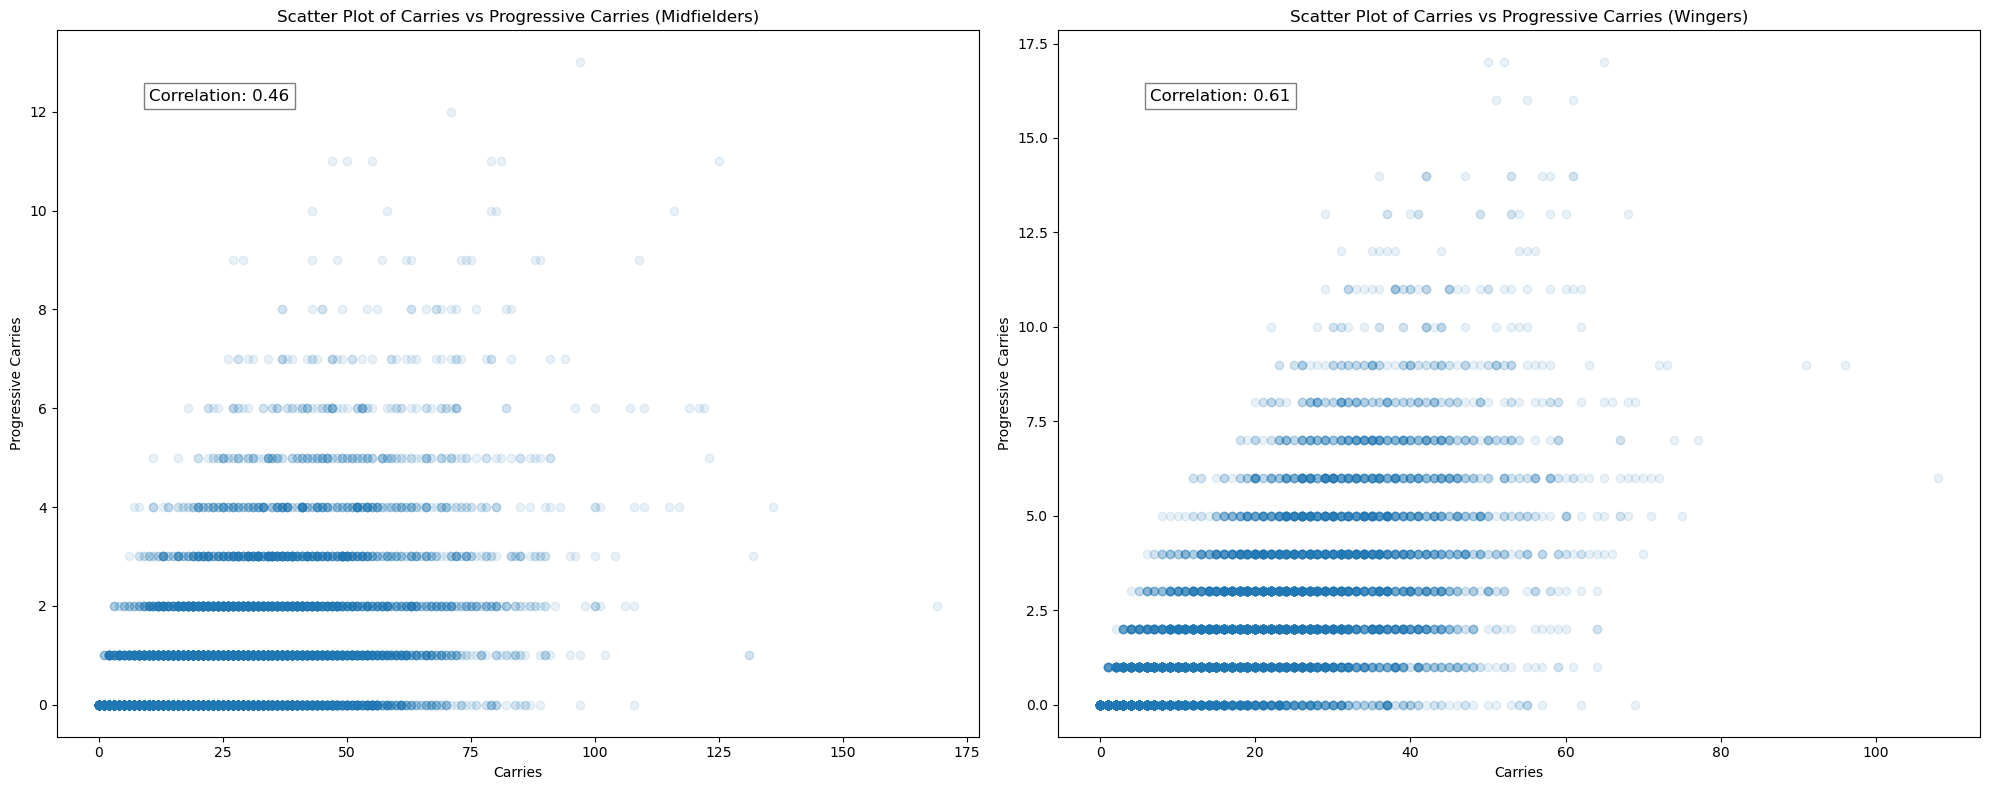

In [6]:
#create midfielders and wingers dataset for carries and progressive carries 
mid_carries_dat = pd.DataFrame ({
    'Carries': att_explore[(att_explore['Midfielders'] == 1)]['Carries'].values,   # Assists == 0 and Crosses into Final Third > 0
    'Progressive Carries': att_explore[(att_explore['Midfielders'] == 1)]['Progressive Carries'].values   # Assists != 0 and Crosses into Final Third > 0
})

wingers_carries_dat = pd.DataFrame({
    'Carries': att_explore[(att_explore['Wingers'] == 1)]['Carries'].values,   # Assists == 0 and Crosses into Final Third > 0
    'Progressive Carries': att_explore[(att_explore['Wingers'] == 1)]['Progressive Carries']   # Assists != 0 and Crosses into Final Third > 0
})


#calculate the correlation
mid_corr = mid_carries_dat['Carries'].corr(mid_carries_dat['Progressive Carries'])
wingers_corr = wingers_carries_dat['Carries'].corr(wingers_carries_dat['Progressive Carries'])


#plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))

ax1.scatter(mid_carries_dat['Carries'], mid_carries_dat['Progressive Carries'], alpha=0.1)
ax1.set_title(f'Scatter Plot of Carries vs Progressive Carries (Midfielders)')
ax1.set_xlabel('Carries')
ax1.set_ylabel('Progressive Carries')
ax1.text(0.1, 0.9, f'Correlation: {mid_corr:.2f}', 
         transform=ax1.transAxes, fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))


ax2.scatter(wingers_carries_dat['Carries'], wingers_carries_dat['Progressive Carries'], alpha=0.1)
ax2.set_title(f'Scatter Plot of Carries vs Progressive Carries (Wingers)')
ax2.set_xlabel('Carries')
ax2.set_ylabel('Progressive Carries')
ax2.text(0.1, 0.9, f'Correlation: {wingers_corr:.2f}', 
         transform=ax2.transAxes, fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

# plt.xticks(rotation = 0, fontsize = 7)
plt.tight_layout()
plt.show()

The scatter plots above allow us to make several inferences. First, we can see that the number of progressive carries is indeed higher for wingers compared to midfielders (CM or DM). We can also see that the number of carries recorded by midfielders is also higher compared to wingers. We can confirm these observations by the boxplots below. 

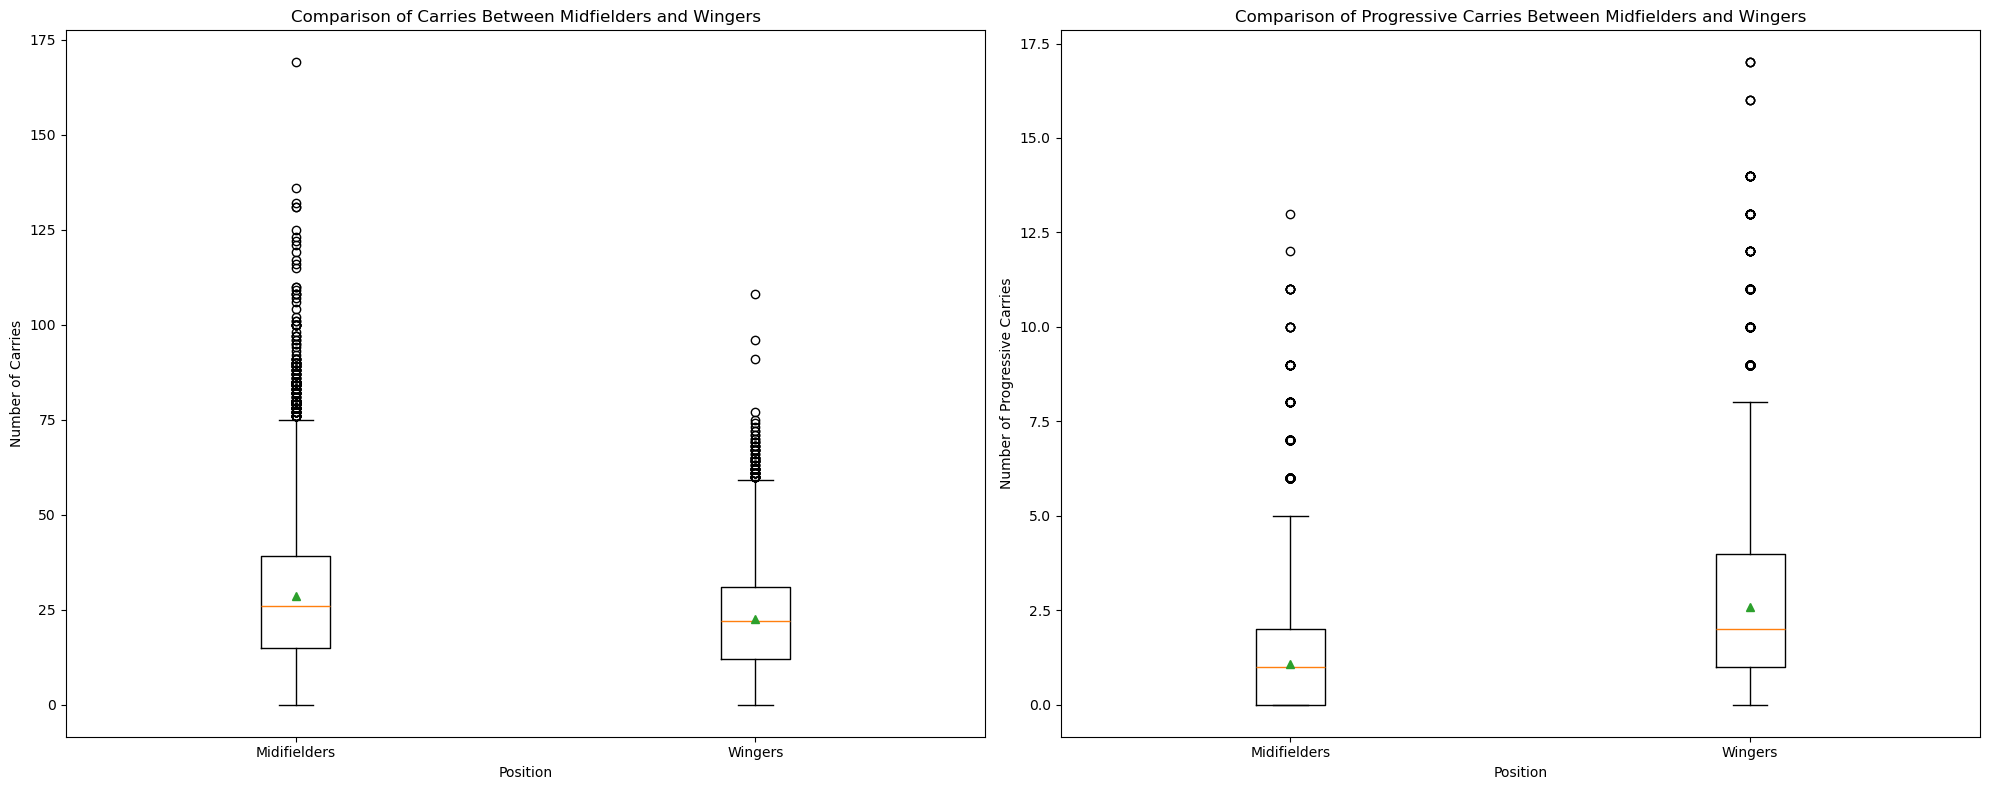

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))

ax1.boxplot([mid_carries_dat['Carries'], wingers_carries_dat['Carries']], labels = ['Midifielders', 'Wingers'], showmeans = True)
ax1.set_title('Comparison of Carries Between Midfielders and Wingers')
ax1.set_xlabel('Position')
ax1.set_ylabel('Number of Carries')

ax2.boxplot([mid_carries_dat['Progressive Carries'], wingers_carries_dat['Progressive Carries']], labels = ['Midifielders', 'Wingers'], showmeans = True)
ax2.set_title('Comparison of Progressive Carries Between Midfielders and Wingers')
ax2.set_xlabel('Position')
ax2.set_ylabel('Number of Progressive Carries')

plt.tight_layout()
plt.show()

Going back to the scatter plot, we can see that the correlation between carries and progressive carries is still not super strong. The scatter plots also take on a similar shape.

We now have a look at the relationship between carries and goals/assists. 

### Carries vs Goals

<Figure size 640x480 with 0 Axes>

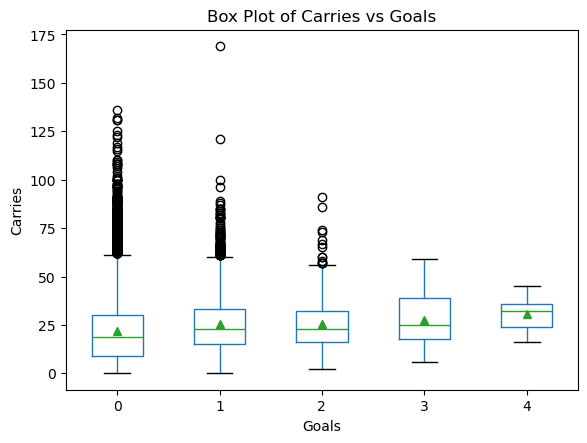

In [ ]:
grouped_boxplot(att_explore, 'Carries', 'Goals')

It appears that the distribution of carries is pretty much the same when grouping the observations by the number of goals scored. Perhaps the number of carries is slightly higher for observations that have scored at least 1 goal. Let's investigate this by grouping these observations (obs. with at least 1 goal) together. 

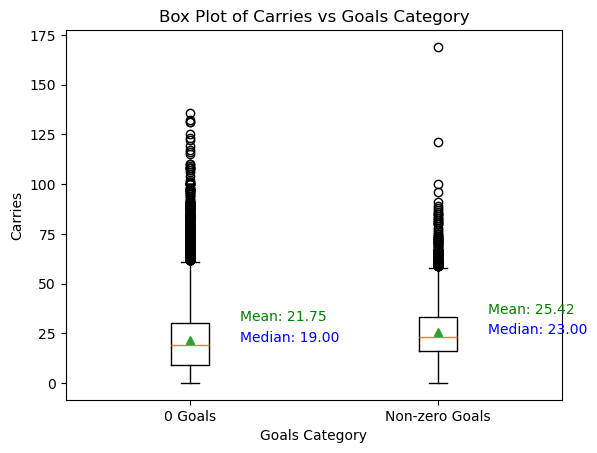

In [ ]:
category_boxplot(att_explore, 'Carries', 'Goals', 15)

This boxplot shows us that the mean/median carries is indeed higher for observations that have scored at least 1 goal. However, I suspect this has to do with the fact that the more minutes are played, the more carries are accumulated. We saw previously that there is a positive relationship between minutes played and goals scored. It may be the case that the higher number of carries recorded for players with at least 1 goal is just a reflection of the fact that they are also playing more minutes 

We start off by plotting carries against minutes played. 

#### Carries vs Minutes Played 

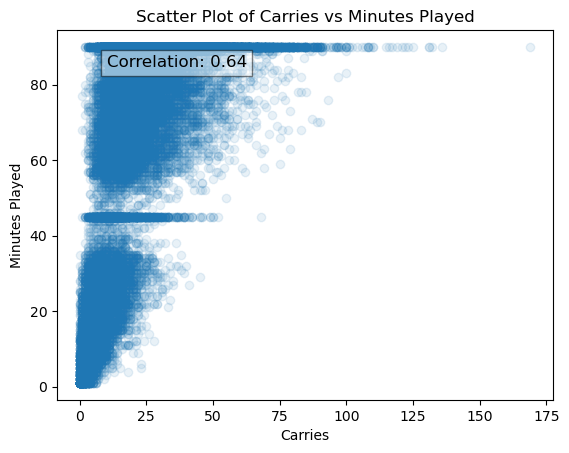

In [ ]:
scatter_plot(att_explore, 'Carries', 'Minutes Played')

We can see that the general pattern is that the more minutes that are played, the greater the number of carries accumulated. The correlation of 0.64 reflects this. 

Based on this, we can try to standardise the relationship between carries and minutes played by computing the number of carries per 90. In other words, we will divide the number of carries for each observation by minutes played, and then multiply this by 90. Let's do this and then plot the result. 

#### Carries per 90

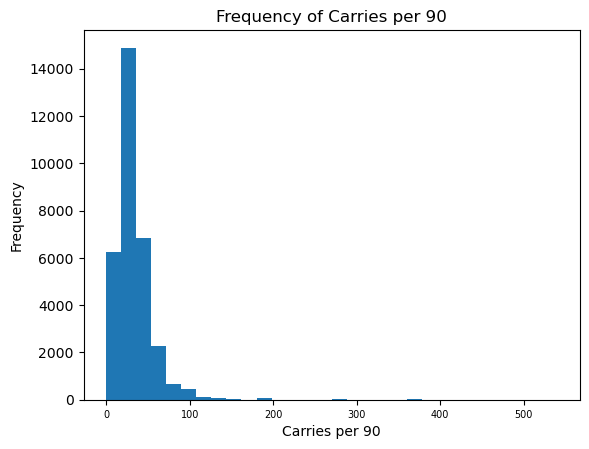

In [11]:
carries_p90 = np.round((att_explore['Carries']/att_explore['Minutes Played'])*90)

fig, ax = plt.subplots()

plt.hist(carries_p90, bins = 30)
plt.xlabel('Carries per 90')
plt.ylabel('Frequency')
plt.title('Frequency of Carries per 90')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
# ax.set_xticks(range(0, 30, 5))
# ax.set_xticklabels(range(0, 30, 5))

plt.xticks(rotation = 0, fontsize = 7)
plt.show()

There appears to be some outliers. This is not a surprise, as there are likely to be some observations that had relatively large numbers for carries whilst only playing very few minutes. Let's have a look at these by looking at the largest values. 

In [12]:
#get unique values
unique_counts = carries_p90.value_counts().sort_index(ascending=False)
print(unique_counts.head(20))

540.0     4
450.0     7
414.0     1
405.0     2
360.0    15
345.0     1
315.0     2
300.0     1
292.0     1
270.0    29
240.0     1
225.0     3
220.0     1
216.0     2
210.0     5
202.0     2
200.0     1
198.0     1
180.0    75
172.0     1
Name: count, dtype: int64


Let's then have a look at the minutes played for the 4 observations that have a carries per 90 value of 540

In [13]:
att_explore.loc[att_explore.index[carries_p90 == 540].tolist()][['Minutes Played', 'Carries']]

,Minutes Played,Carries
5588,1,6
11819,1,6
20225,1,6
21573,1,6


So the 4 observations that recorded 540 carries per 90 only played 1 minute, but accumulated 6 carries in the 1 minute that they played. Obviously the 540 carries per 90 is not really representative of what we are trying to represent by using carries per 90. It makes sense to remove these obseravtions. Let's continue to take a look at the observations that appear to be outliers when looking at carries per 90. 

In [14]:
att_explore.loc[att_explore.index[carries_p90 == 450].tolist()][['Minutes Played', 'Carries']]

,Minutes Played,Carries
9782,1,5
16797,1,5
18887,1,5
19214,1,5
20226,1,5
21656,1,5
22611,1,5


In [15]:
att_explore.loc[att_explore.index[carries_p90 == 414].tolist()][['Minutes Played', 'Carries']]

,Minutes Played,Carries
5071,5,23


In [16]:
att_explore.loc[att_explore.index[carries_p90 == 405].tolist()][['Minutes Played', 'Carries']]

,Minutes Played,Carries
6878,2,9
23605,4,18


In [17]:
att_explore.loc[att_explore.index[carries_p90 == 360].tolist()][['Minutes Played', 'Carries']]

,Minutes Played,Carries
1543,1,4
1935,1,4
3413,1,4
3558,1,4
8387,1,4
10104,1,4
12239,1,4
12515,1,4
13293,1,4
13606,1,4


Up till now, it appears that a lot of the observations that recorded outlier values for carries per 90 are associated with observations that only played 1 minute. Let's try remove these observations and then recalculate carries per 90 to see how many outlier values are removed. 

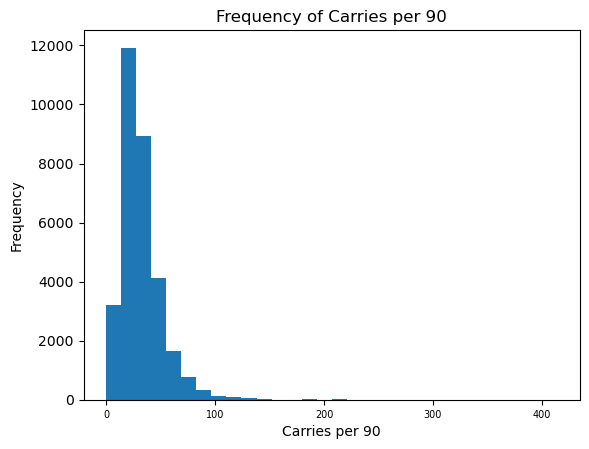

In [18]:
carries_per90_filtered = att_explore[att_explore['Minutes Played'] > 1]

carries_p90 = np.round((carries_per90_filtered['Carries']/carries_per90_filtered['Minutes Played'])*90)

fig, ax = plt.subplots()

plt.hist(carries_p90, bins = 30)
plt.xlabel('Carries per 90')
plt.ylabel('Frequency')
plt.title('Frequency of Carries per 90')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
# ax.set_xticks(range(0, 30, 5))
# ax.set_xticklabels(range(0, 30, 5))

plt.xticks(rotation = 0, fontsize = 7)
plt.show()

In [19]:
#get unique values
unique_counts = carries_p90.value_counts().sort_index(ascending=False)
print(unique_counts.head(15))

414.0    1
405.0    2
345.0    1
315.0    2
300.0    1
292.0    1
270.0    3
240.0    1
225.0    3
220.0    1
216.0    2
210.0    5
202.0    2
200.0    1
198.0    1
Name: count, dtype: int64


There still appears to be some outliers, even after removing the observations that have played 1 minute or less. Let's continue to have a look at the minutes played for the observations that are presenting outlier values for carries per 90. 

In [20]:
#list of unique carries per 90 values that are considered outliers 
carries_per90_outliers = unique_counts.head(15).index.tolist()

filtered_rows = pd.DataFrame()
for value in carries_per90_outliers:
    current_rows = carries_per90_filtered.loc[carries_per90_filtered.index[carries_p90 == value].tolist()][['Minutes Played', 'Carries']]
    current_rows['Carries per 90'] = value
    filtered_rows = pd.concat([filtered_rows, current_rows], ignore_index=True)
    
filtered_rows

,Minutes Played,Carries,Carries per 90
0,5,23,414.0
1,2,9,405.0
2,4,18,405.0
3,6,23,345.0
4,2,7,315.0
5,2,7,315.0
6,3,10,300.0
7,4,13,292.0
8,5,15,270.0
9,2,6,270.0


So we can see that majority of the observations here have a minutes played value that is less than 10. Let's perform a further filtering, this time removing all observations that have played less than 10 minutes, instead of only removing observations that have played less than 1 minute. 

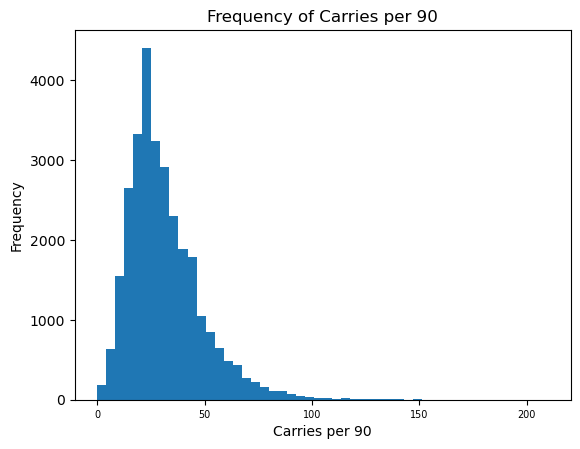

In [21]:
carries_per90_filtered = att_explore[att_explore['Minutes Played'] > 10]

carries_p90 = np.round((carries_per90_filtered['Carries']/carries_per90_filtered['Minutes Played'])*90)

fig, ax = plt.subplots()

plt.hist(carries_p90, bins = 50)
plt.xlabel('Carries per 90')
plt.ylabel('Frequency')
plt.title('Frequency of Carries per 90')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
# ax.set_xticks(range(0, 30, 5))
# ax.set_xticklabels(range(0, 30, 5))

plt.xticks(rotation = 0, fontsize = 7)
plt.show()

In [22]:
#get unique values
unique_counts = carries_p90.value_counts().sort_index(ascending=False)
print(unique_counts.head(10))

210.0    1
180.0    1
172.0    1
169.0    1
167.0    1
158.0    2
155.0    1
150.0    1
147.0    4
141.0    3
Name: count, dtype: int64


Let's further filter by removing all observations that have a carries per 90 value that is greater than 150. 

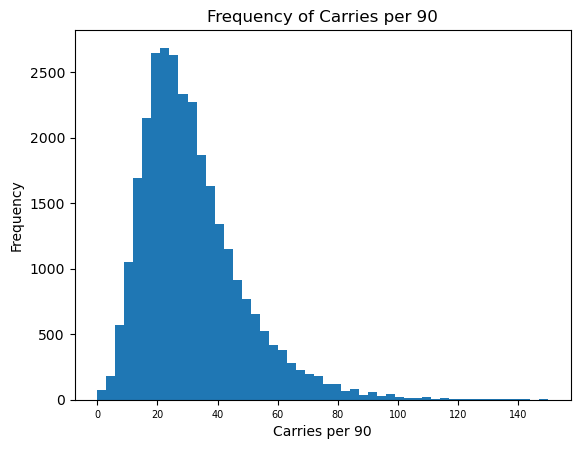

In [23]:
carries_per90_filtered = carries_per90_filtered[carries_p90 <= 150]

carries_per90_filtered['Carries per 90'] = np.round((carries_per90_filtered['Carries']/carries_per90_filtered['Minutes Played'])*90)

fig, ax = plt.subplots()

plt.hist(carries_per90_filtered['Carries per 90'], bins = 50)
plt.xlabel('Carries per 90')
plt.ylabel('Frequency')
plt.title('Frequency of Carries per 90')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
# ax.set_xticks(range(0, 30, 5))
# ax.set_xticklabels(range(0, 30, 5))

plt.xticks(rotation = 0, fontsize = 7)
plt.show()

After performing the necessary filtering, we can see that the carries per 90 feature is much more uniform. We are now in a position to continue our analysis. 

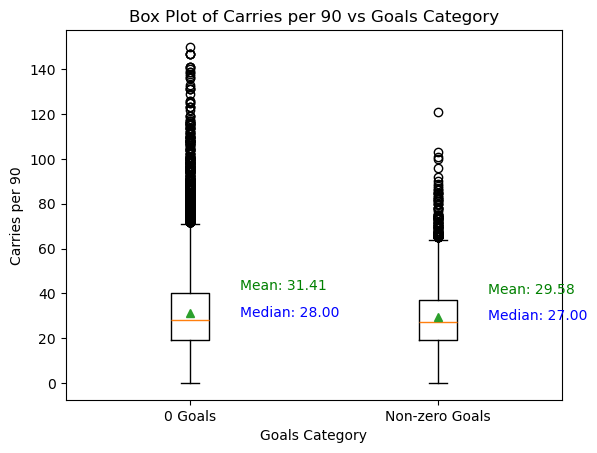

In [24]:
# Create a figure and axes
plt.figure()

# Prepare the data
# Group the data into two categories: '0 Goals' and 'Non-zero Goals'
data = [carries_per90_filtered[carries_per90_filtered['Goals'] == 0]['Carries per 90'],   # Goals == 0
        carries_per90_filtered[carries_per90_filtered['Goals'] != 0]['Carries per 90']]   # Goals != 0

# Create a boxplot with two boxes
plt.boxplot(data, labels=['0 Goals', 'Non-zero Goals'], showmeans = True)

# Set the title and labels
plt.title('Box Plot of Carries per 90 vs Goals Category')
plt.xlabel('Goals Category')
plt.ylabel('Carries per 90')

for i in range(len(data)):
    # Median (the horizontal line in the box)
    median = np.median(data[i])
    plt.text(i + 1.2, median, f'Median: {median:.2f}', ha='left', va='bottom', color='blue')

    # Mean (the green triangle in the boxplot)
    mean = np.mean(data[i])
    plt.text(i + 1.2, mean + 15, f'Mean: {mean:.2f}', ha='left', va='top', color='green')
    
# Show the plot
plt.show()

The plot above compares the distribution of carries per 90 for observations that have scored no goals with observations that have scored at least 1 goal. We can see that the distributions are quite similar to each other. In other words, after standardising for the minutes played, there is no longer much difference in the number of carries when comparing observations that have scored no goals with those that have scored at least 1 goal. Based on this, we are more confident in concluding that the fact that there were differences in the mean/median number of carries when comparing observations with no goals with those that have at least 1 goal is probably attributed to the more minutes played by observations that have recorded more carries. It is not because there is any relationship between carries and goals scored. 

We now move forward to looking at the relationship between carries and assists. 

### Carries vs Assists

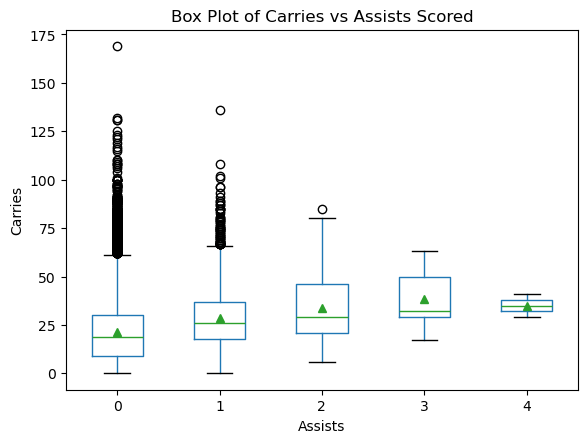

In [25]:
plt.figure
att_explore.boxplot(column = 'Carries', by = 'Assists', grid = False, showmeans = True)
plt.title('Box Plot of Carries vs Assists Scored')
plt.suptitle('')
plt.xlabel('Assists')
plt.ylabel('Carries')
plt.show()

This plot shows us that there does appear to be a positive relationship between assists and carries. Again, we need to perform the same analysis as we did previously to determine whether or not this is because carries is also positively related to minutes played. 

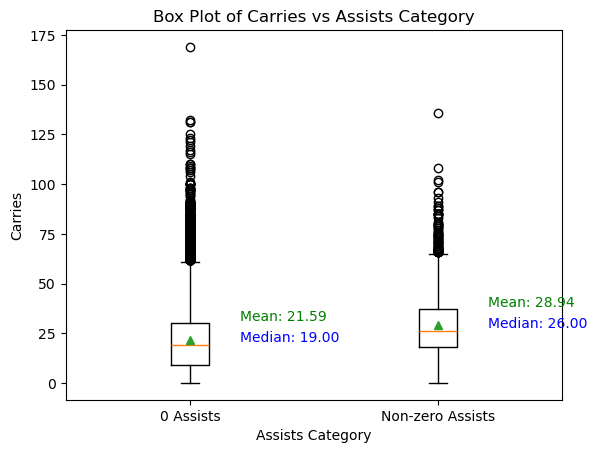

In [26]:
# Create a figure and axes
plt.figure()

# Prepare the data
# Group the data into two categories: '0 Assists' and 'Non-zero Assists'
data = [att_explore[att_explore['Assists'] == 0]['Carries'],   # Assists == 0
        att_explore[att_explore['Assists'] != 0]['Carries']]   # Assists != 0

# Create a boxplot with two boxes
plt.boxplot(data, labels=['0 Assists', 'Non-zero Assists'], showmeans = True)

# Set the title and labels
plt.title('Box Plot of Carries vs Assists Category')
plt.xlabel('Assists Category')
plt.ylabel('Carries')

for i in range(len(data)):
    # Median (the horizontal line in the box)
    median = np.median(data[i])
    plt.text(i + 1.2, median, f'Median: {median:.2f}', ha='left', va='bottom', color='blue')

    # Mean (the green triangle in the boxplot)
    mean = np.mean(data[i])
    plt.text(i + 1.2, mean + 15, f'Mean: {mean:.2f}', ha='left', va='top', color='green')
    
# Show the plot
plt.show()

When grouping together observations that recorded zero/non-zero assists, we see that both the mean/median number of carries is lower for the observations that recorded zero assists. This further strengthens what we identified in the initial box plot.

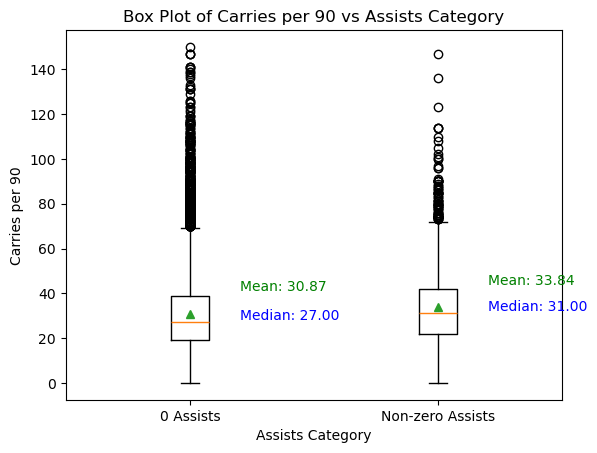

In [27]:
# Create a figure and axes
plt.figure()

# Prepare the data
# Group the data into two categories: '0 Assists' and 'Non-zero Assists'
data = [carries_per90_filtered[carries_per90_filtered['Assists'] == 0]['Carries per 90'],   # Assists == 0
        carries_per90_filtered[carries_per90_filtered['Assists'] != 0]['Carries per 90']]   # Assists != 0

# Create a boxplot with two boxes
plt.boxplot(data, labels=['0 Assists', 'Non-zero Assists'], showmeans = True)

# Set the title and labels
plt.title('Box Plot of Carries per 90 vs Assists Category')
plt.xlabel('Assists Category')
plt.ylabel('Carries per 90')

for i in range(len(data)):
    # Median (the horizontal line in the box)
    median = np.median(data[i])
    plt.text(i + 1.2, median, f'Median: {median:.2f}', ha='left', va='bottom', color='blue')

    # Mean (the green triangle in the boxplot)
    mean = np.mean(data[i])
    plt.text(i + 1.2, mean + 15, f'Mean: {mean:.2f}', ha='left', va='top', color='green')
    
# Show the plot
plt.show()

When looking at the relationship between assists and carries per 90, we can see that the difference in the median/mean carries per 90 is now much closer between the two groups of observations. Once again, this shows us that some of the reason why we saw a higher median/mean number of carries for observations with non-zero assists can be attributed to more carries being accumualted as a result of more minutes being played. 

We next look at the relationship between progressive carries and goals/assists. 

### Relationship between Progressive Carries and Minutes Played

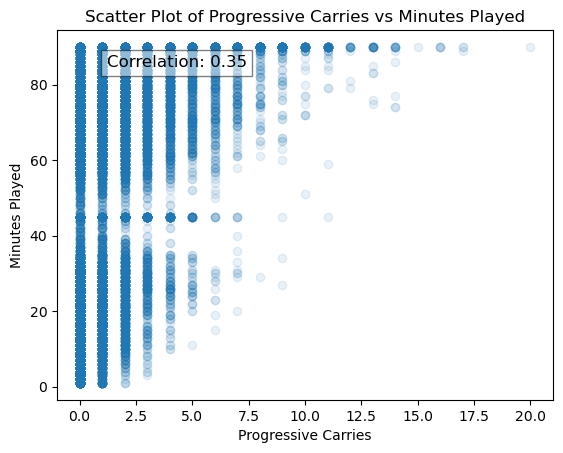

In [28]:
#calculate the correlation
correlation = att_explore['Progressive Carries'].corr(att_explore['Minutes Played'])

plt.figure()
plt.scatter(att_explore['Progressive Carries'], att_explore['Minutes Played'], alpha=0.1)
plt.title(f'Scatter Plot of Progressive Carries vs Minutes Played')
plt.xlabel('Progressive Carries')
plt.ylabel('Minutes Played')

plt.text(0.1, 0.9, f'Correlation: {correlation:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

plt.show()

A scatter plot of progressive carries against minutes played shows us that the relationship between the number of progressive carries accumulated and minutes played is not as strong as the relationship between carries and minutes played. A correlation of 0.35 does indicate that there is some correlation between these two features (which makes sense, the more minutes you are on the pitch the more time you have to accumulate a progressive carry), but the impact of minutes played on progressive carries recorded isn't particularly strong. Perhaps the position played by each player has a bigger impact on the number of progressive carries recorded. 

/var/folders/dv/bjx4hkg54x17symh1g3_3jf80000gq/T/ipykernel_28292/3080208084.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  position_carries['Position'] = pd.Categorical(position_carries['Position'], categories=['Defenders', 'Midfielders', 'Wide Midfielders'


<Figure size 640x480 with 0 Axes>

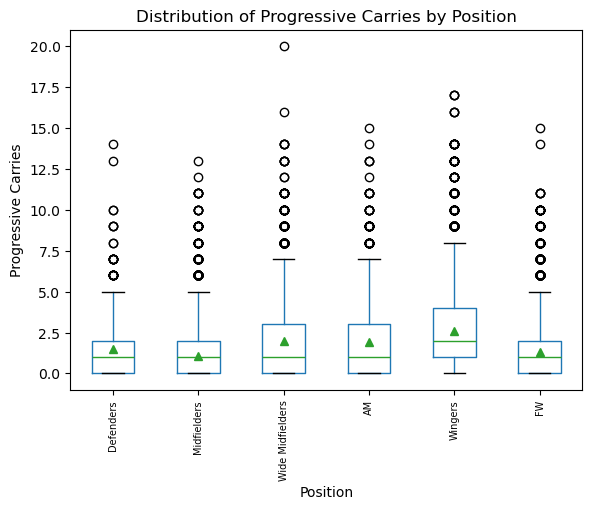

In [29]:
melted_df = att_explore.melt(id_vars=['Progressive Carries'], 
                             value_vars=['Defenders', 'Midfielders', 'Wide Midfielders', 'AM', 'Wingers', 'FW'], 
                             var_name='Position', value_name='Played')

position_carries = melted_df[melted_df['Played'] == 1]

# Convert 'Position' to a categorical type with the specified order
position_carries['Position'] = pd.Categorical(position_carries['Position'], categories=['Defenders', 'Midfielders', 'Wide Midfielders'
                                                                                        , 'AM', 'Wingers', 'FW'], ordered=True)

plt.figure()
position_carries.boxplot(column = 'Progressive Carries', by = 'Position', grid = False, showmeans = True)
plt.suptitle('')
plt.title('Distribution of Progressive Carries by Position')
plt.xlabel('Position')
plt.ylabel('Progressive Carries')
plt.xticks(fontsize=7, rotation = 90)
plt.show()

Based on this plot, it appears that the median/mean number of progressive carries is relatively similar across the positions, except for wingers, who have a higher number of mean/median progressive carries. Wide midfielders and attacking midfielders also have a higher mean number of progressive carries compared to the other positions, whilst midfielders, forwards and defenders have the lowest average progressive carries. 

### Progressive Carries vs Goals

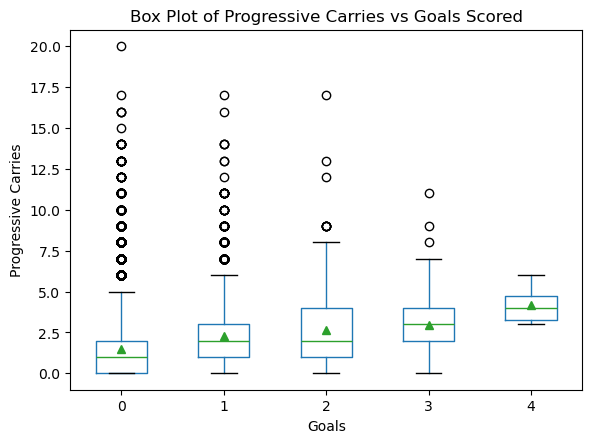

In [30]:
plt.figure
att_explore.boxplot(column = 'Progressive Carries', by = 'Goals', grid = False, showmeans = True)
plt.title('Box Plot of Progressive Carries vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Progressive Carries')
plt.show()

This boxplot suggests that there is a positive relationship between progressive carries and goals. 

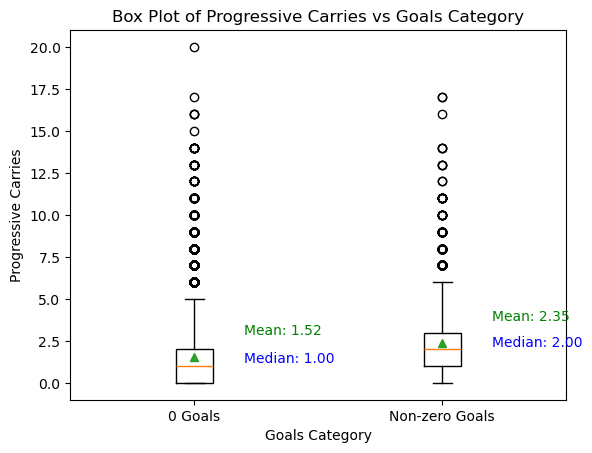

In [33]:
# Create a figure and axes
plt.figure()

# Prepare the data
# Group the data into two categories: '0 Goals' and 'Non-zero Goals'
data = [att_explore[att_explore['Goals'] == 0]['Progressive Carries'],   # Goals == 0
        att_explore[att_explore['Goals'] != 0]['Progressive Carries']]   # Goals != 0

# Create a boxplot with two boxes
plt.boxplot(data, labels=['0 Goals', 'Non-zero Goals'], showmeans = True)

# Set the title and labels
plt.title('Box Plot of Progressive Carries vs Goals Category')
plt.xlabel('Goals Category')
plt.ylabel('Progressive Carries')

for i in range(len(data)):
    # Median (the horizontal line in the box)
    median = np.median(data[i])
    plt.text(i + 1.2, median, f'Median: {median:.2f}', ha='left', va='bottom', color='blue')

    # Mean (the green triangle in the boxplot)
    mean = np.mean(data[i])
    plt.text(i + 1.2, mean + 2, f'Mean: {mean:.2f}', ha='left', va='top', color='green')
    
# Show the plot
plt.show()

When grouping the observations with at least 1 goal scored together, we can see that this group of observations records a higher median/mean number of progressive carries when compared to the group of observations that scored no goals. We saw previously that there doesn't appear to be a strong relationship between progressive carries and minutes played, so it is not likely that this difference can be attributed to the impact of more minutes played. We also saw that it wingers accumulate the most progressive carries, whilst forwards are actually one of the positions which accumulates the least progressive carries. Therefore, it may be the case that there is a fundamental relationship between the number of progressive carries recorded and the likelihood of scoring a goal. 

Despite the plots above, it is still somewhat unexpected to see a positive relationship between goals and progressive carries. To further investigate this, let's plot the distribution of progressive carries when grouping observations by whether or not they have scored at least 1 goal for each position. 

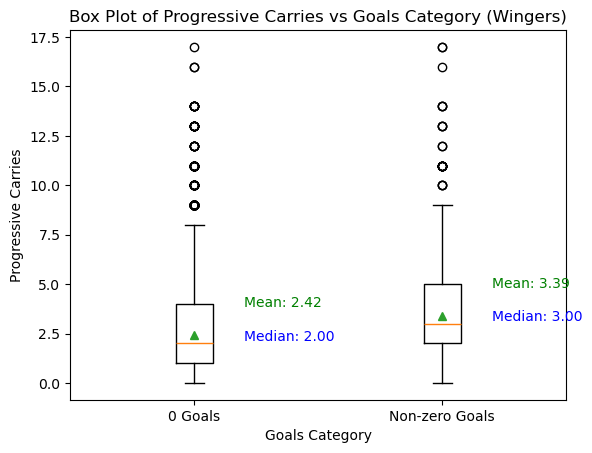

In [35]:
# Create a figure and axes
plt.figure()

# Prepare the data
# Group the data into two categories: '0 Goals' and 'Non-zero Goals'
data = [att_explore[(att_explore['Goals'] == 0) & att_explore['Wingers'] == 1]['Progressive Carries'],   # Goals == 0 and Wingers = 1
        att_explore[(att_explore['Goals'] != 0) & att_explore['Wingers'] == 1]['Progressive Carries']]   # Goals != 0 and Wingers = 1

# Create a boxplot with two boxes
plt.boxplot(data, labels=['0 Goals', 'Non-zero Goals'], showmeans = True)

# Set the title and labels
plt.title('Box Plot of Progressive Carries vs Goals Category (Wingers)')
plt.xlabel('Goals Category')
plt.ylabel('Progressive Carries')

for i in range(len(data)):
    # Median (the horizontal line in the box)
    median = np.median(data[i])
    plt.text(i + 1.2, median, f'Median: {median:.2f}', ha='left', va='bottom', color='blue')

    # Mean (the green triangle in the boxplot)
    mean = np.mean(data[i])
    plt.text(i + 1.2, mean + 2, f'Mean: {mean:.2f}', ha='left', va='top', color='green')
    
# Show the plot
plt.show()

When only plotting observations that played as wingers, we can see that the pattern still holds. The mean/median number of progressive carries is higher for wingers that scored at least 1 goal, compared to wingers that did not score. 

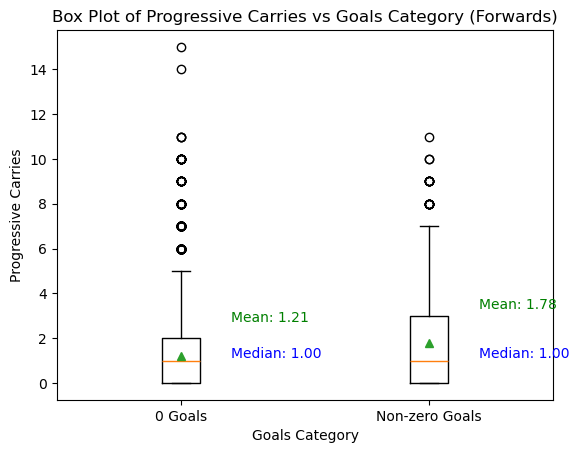

In [36]:
# Create a figure and axes
plt.figure()

# Prepare the data
# Group the data into two categories: '0 Goals' and 'Non-zero Goals'
data = [att_explore[(att_explore['Goals'] == 0) & att_explore['FW'] == 1]['Progressive Carries'],   # Goals == 0 and FW = 1
        att_explore[(att_explore['Goals'] != 0) & att_explore['FW'] == 1]['Progressive Carries']]   # Goals != 0 and FW = 1

# Create a boxplot with two boxes
plt.boxplot(data, labels=['0 Goals', 'Non-zero Goals'], showmeans = True)

# Set the title and labels
plt.title('Box Plot of Progressive Carries vs Goals Category (Forwards)')
plt.xlabel('Goals Category')
plt.ylabel('Progressive Carries')

for i in range(len(data)):
    # Median (the horizontal line in the box)
    median = np.median(data[i])
    plt.text(i + 1.2, median, f'Median: {median:.2f}', ha='left', va='bottom', color='blue')

    # Mean (the green triangle in the boxplot)
    mean = np.mean(data[i])
    plt.text(i + 1.2, mean + 2, f'Mean: {mean:.2f}', ha='left', va='top', color='green')
    
# Show the plot
plt.show()

Similarly for forwards, the mean number of progressive carries is higher for those that scored at least 1 goal (although the median value is the same). 

Based on these plots, we can probably conclude that progressive carries is a feature worth keeping as it predicts goals scored to a certain extent.  

### Progressive Carries vs Assists

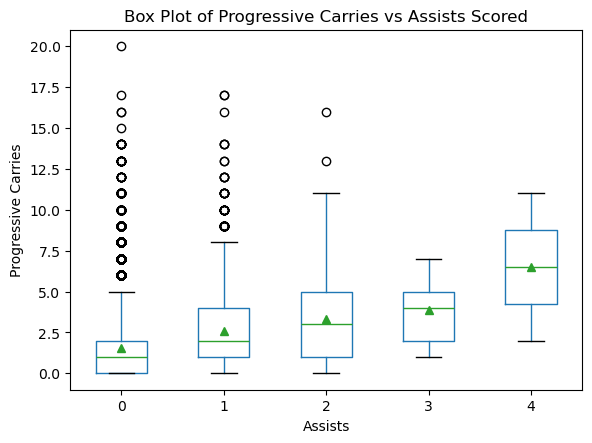

In [37]:
plt.figure
att_explore.boxplot(column = 'Progressive Carries', by = 'Assists', grid = False, showmeans = True)
plt.title('Box Plot of Progressive Carries vs Assists Scored')
plt.suptitle('')
plt.xlabel('Assists')
plt.ylabel('Progressive Carries')
plt.show()

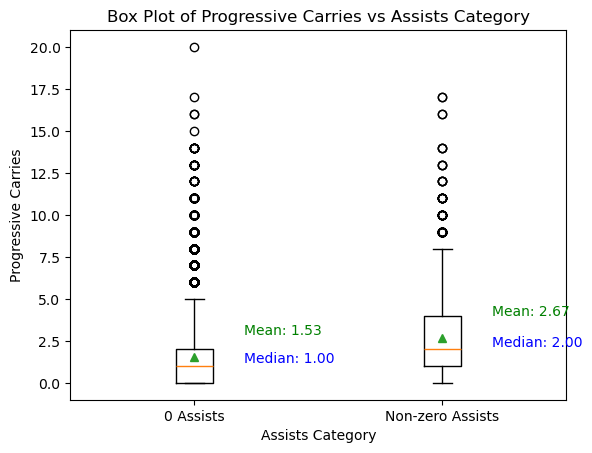

In [38]:
# Create a figure and axes
plt.figure()

# Prepare the data
# Group the data into two categories: '0 Assists' and 'Non-zero Assists'
data = [att_explore[att_explore['Assists'] == 0]['Progressive Carries'],   # Assists == 0
        att_explore[att_explore['Assists'] != 0]['Progressive Carries']]   # Assists != 0

# Create a boxplot with two boxes
plt.boxplot(data, labels=['0 Assists', 'Non-zero Assists'], showmeans = True)

# Set the title and labels
plt.title('Box Plot of Progressive Carries vs Assists Category')
plt.xlabel('Assists Category')
plt.ylabel('Progressive Carries')

for i in range(len(data)):
    # Median (the horizontal line in the box)
    median = np.median(data[i])
    plt.text(i + 1.2, median, f'Median: {median:.2f}', ha='left', va='bottom', color='blue')

    # Mean (the green triangle in the boxplot)
    mean = np.mean(data[i])
    plt.text(i + 1.2, mean + 2, f'Mean: {mean:.2f}', ha='left', va='top', color='green')
    
# Show the plot
plt.show()

We once again see a positive relationship between the number of progressive carries recorded and assists. 

### Relationship between Progressive Carries and Progressive Carry Distance

So we can see that there is a positive relationship between progressive carries and goals/assists which doesn't seem to be attributed to either minutes played or position played. We now want to have a look at the relationship between progressive carries and progressive carry distance, and whether or not progressive carry distance can possibly help us explain why there appears to be a positive relationship between progressive carries and goals/assists. 

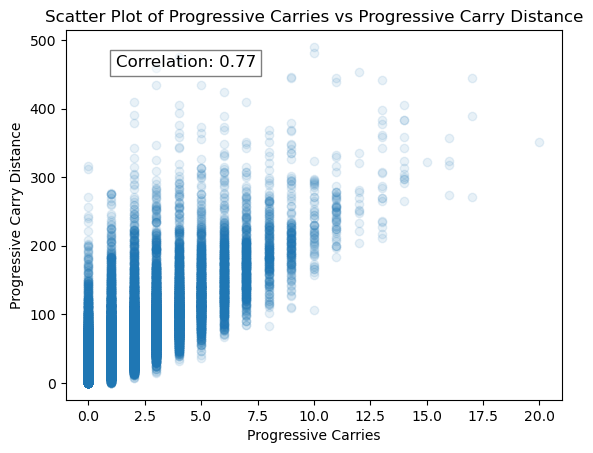

In [42]:
scatter_plot(att_explore, 'Progressive Carries', 'Progressive Carry Distance')

The scatter plot above shows that there appears to be quite a strong relationship between progressive carries and progressive carry distance. This is reflected by the correlation between these two features being 0.77. Since these features seem to be quite strongly correlated, we expect to see positive relationships between progressive carry distance and goals/assists. 